Text(0.5, 1.0, 'The graph in the question is')

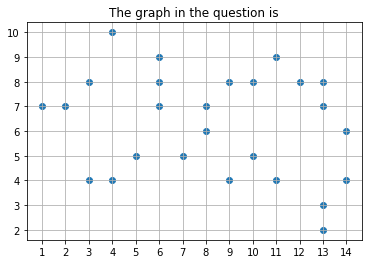

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
from math import *
import string
import numpy as np
x = [1,2,3,3,4,4,5,6,6,6,7,8,8,9,9,10,10,11,11,12,13,13,13,13,14,14]
y = [7,7,4,8,4,10,5,7,8,9,5,6,7,4,8,5,8,4,9,8,2,3,7,8,4,6]
arr = []
for i in range(len(x)):
    arr.append((x[i],y[i]))
data = np.array(arr)
df = pd.DataFrame(data,columns=['X','Y'])
plt.grid()
lst = list(range(1,26))
plt.xticks(lst,lst)
plt.yticks(lst,lst)
plt.scatter(data[:,0],data[:,1])
plt.title('The graph in the question is')

## 3.2

In [ ]:
df = pd.DataFrame(data,columns=['X','Y'])
clustering = DBSCAN(eps=2, min_samples=3).fit(data)
db_dataset = df.copy()
db_dataset['Cluster'] = clustering.labels_
outliers = db_dataset[db_dataset['Cluster'] == -1]
outliers_arr = []
for index,row in outliers.iterrows():
    outliers_arr.append((row['X'],row['Y']))
print('The noise points are',outliers_arr)

The noise points are [(4, 10)]


## 3.1

In [ ]:
def distance(x1,x2):
    res = sqrt((x2[0] - x1[0])**2 + (x2[1] - x1[1])**2)
    return res

In [ ]:
count = 0
core = []
for i in arr:
    count = 0
    for j in arr:
        if(distance(i,j) <= 2.0):
            count = count + 1
    if(count >= 3):
        core.append(i)
print('The core points are',core)

The core points are [(2, 7), (4, 4), (5, 5), (6, 7), (6, 8), (6, 9), (7, 5), (8, 6), (8, 7), (9, 4), (9, 8), (10, 5), (10, 8), (11, 4), (11, 9), (12, 8), (13, 3), (13, 7), (13, 8), (14, 4), (14, 6)]


In [ ]:
border = []
for point in arr:
    if point not in core and point not in outliers_arr:
        border.append(point)
print('The border points are',border)

The border points are [(1, 7), (3, 4), (3, 8), (13, 2)]


## 3.3

In [ ]:
clusters = set(db_dataset['Cluster'].tolist())
clusters = tuple(clusters)
print('The Density based clusters are:')
print()
for val in clusters:
    if(val != -1):
        print(f'The {val} density cluster is')
    for index,row in db_dataset.iterrows():
        if(val != -1 and row['Cluster'] == val):
            print((row['X'],row['Y']),end = ' ')
    print('\n')

The Density based clusters are:

The 0 density cluster is
(1, 7) (2, 7) (3, 8) 

The 1 density cluster is
(3, 4) (4, 4) (5, 5) (6, 7) (6, 8) (6, 9) (7, 5) (8, 6) (8, 7) (9, 8) (10, 8) (11, 9) (12, 8) (13, 2) (13, 3) (13, 7) (13, 8) (14, 4) (14, 6) 

The 2 density cluster is
(9, 4) (10, 5) (11, 4) 





## 3.4

k = (6,7)
e = (6,8)
As we can see, the distance between points e and k is 1, which is less than the given radius of 2.So k has e as the core point in its neighbourhood.So k is directly density reachable from e

## 3.5

z = (13,2) r = (7,5). Both z and r belong to the same density cluster (2 density cluster). So there will be set of 
core points which are leading from point r to point z.
One such possible connecting path is as follows: r f s w y z


## 3.6

e is not density connected to v as there exists no core point such that both points(e and v) are density reachable from that core point.